In [46]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/a0102/OneDrive/바탕 화면/데이터전처리/Data_Sample.csv')

In [49]:
import pandas as pd
df = pd.read_csv("C:/Users/a0102/OneDrive/바탕 화면/데이터전처리/Data_Sample.csv", header=0)


interpolation

#1
df.isnull().sum()

#2
df=df.rename(columns={
    'Value1':'A',
    'Value2':'B',
    'Value3':'C',
})

#3
num_var = df.select_dtypes(include = ['number']).columns
str_var = df.select_dtypes(include = ['object', 'category']).columns

df[num_var] = df[num_var].fillna(df[num_var].median())

df = pd.concat([df[num_var], df[str_var]], axis=1)


#5
df['total'] = df['A']+df['B']+df['C']
df=df.drop(['A','B','C'],axis=1)

#6
split_df = df['Model_Serial'].str.split('-', expand=True)
split_df.columns = ['Model', 'Serial']

split_df['알파'] = split_df['Model'].str.extract(r'(Alpha)')
split_df['베타'] = split_df['Model'].str.extract(r'(Beta)')
split_df['감마'] = split_df['Model'].str.extract(r'(Gamma)')
split_df['합'] = split_df['알파'] +split_df['베타'] +split_df['감마']
split_df

,Model,Serial,알파,베타,감마,합
0,Gamma,0001,NaN,NaN,Gamma,NaN
1,Alpha,0002,Alpha,NaN,NaN,NaN
2,Alpha,0003,Alpha,NaN,NaN,NaN
3,Gamma,0004,NaN,NaN,Gamma,NaN
4,Beta,0005,NaN,Beta,NaN,NaN
...,...,...,...,...,...,...
95,Alpha,0096,Alpha,NaN,NaN,NaN
96,Alpha,0097,Alpha,NaN,NaN,NaN
97,Beta,0098,NaN,Beta,NaN,NaN
98,Beta,0099,NaN,Beta,NaN,NaN


In [76]:
df=df.dropna()
df['Value1'] = df['Value1'].astype(int)
df['Value2'] = df['Value2'].astype('category')

df=df.drop(['Value1', 'Value2'], axis=1)
df
,interpolation = cv2.INTER_AREA



,Value3,Model_Serial,Category
0,207.155747,Gamma-0001,C
1,211.215690,Alpha-0002,C
2,221.661025,Alpha-0003,C
4,172.446613,Beta-0005,C
5,181.243499,Gamma-0006,B
...,...,...,...
94,207.140310,Gamma-0095,B
95,186.141808,Alpha-0096,A
96,217.991997,Alpha-0097,A
97,206.145990,Beta-0098,B


In [42]:
import pandas as pd

data = {'date': ['0930', '2024-01-01 1230', '20240101']}
df = pd.DataFrame(data)

df['new1'] = pd.to_datetime(df['date'], format = '%H%M', errors='coerce').dt.time
df['new2'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H%M', errors='coerce')
df['new3'] = pd.to_datetime(df['date'], format = '%Y%m%d', errors='coerce')
df

,date,new1,new2,new3
0,0930,09:30:00,NaT,NaT
1,2024-01-01 1230,NaT,2024-01-01 12:30:00,NaT
2,20240101,NaT,NaT,2024-01-01


In [34]:
import pandas as pd

df = pd.DataFrame({
    '음식': [', 자담치킨', '치킨마요덮밥 ', '피자나라치킨공주 ']
})

df['new1'] = df[df['음식'].str.contains('덮밥')]
df['new2'] = df['음식'].str.extract(r'(피자나라)')
df['new3'] = df['음식'].str.replace(r'(치킨.*)', '족발', regex=True)
df['new4'] = df['음식'].str.replace('치킨', '마라')
df['new5'] = df['음식'].str.strip(', ')
df

,음식,new1,new2,new3,new4,new5
0,", 자담치킨",NaN,NaN,", 자담족발",", 자담마라",자담치킨
1,치킨마요덮밥,치킨마요덮밥,NaN,족발,마라마요덮밥,치킨마요덮밥
2,피자나라치킨공주,NaN,피자나라,피자나라족발,피자나라마라공주,피자나라치킨공주


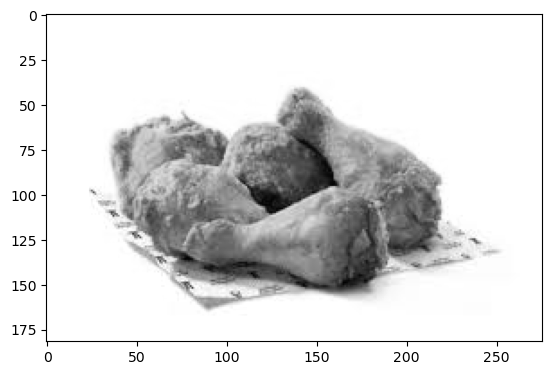

In [6]:
#9
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("C:/images/food.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img, cmap='gray')
plt.show()

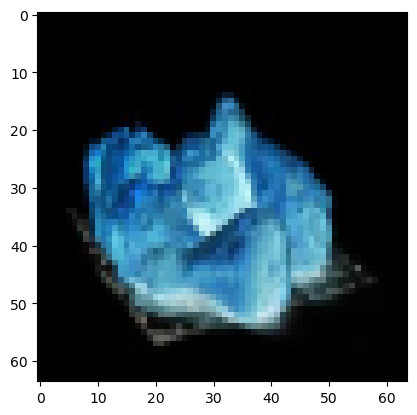

In [18]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("C:/images/food.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (64,64),interpolation=cv2.INTER_AREA)
img = 255-img

plt.imshow(img)
plt.show()